# Regressão Softmax com dados do MNIST

O objetivo deste notebook é ilustrar o uso do mesmo código de uma camada desenvolvido para a classificação do MNIST, porém agora utilizando minibatches com auxílio das classes Dataset e DataLoater.

## Importação das bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable

import torchvision

In [13]:
d_batchsize = dict()

## Carregamento e normalização dos dados do MNIST

In [22]:
dataset_dir = '/data/datasets/MNIST/'
batch_size = 70

dataset_train = torchvision.datasets.MNIST(dataset_dir, train=True, download=False,
                                           transform=torchvision.transforms.ToTensor())
dataset_test = torchvision.datasets.MNIST(dataset_dir, train=False, download=False,
                                          transform=torchvision.transforms.ToTensor())

loader_train = torch.utils.data.DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
loader_test = torch.utils.data.DataLoader(dataset_test, batch_size=batch_size, shuffle=False)

print('Número de minibatches de trenamento:', len(loader_train))
print('Número de minibatches de teste:     ', len(loader_test))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Número de minibatches de trenamento: 858
Número de minibatches de teste:      143

Dimensões dos dados de um minibatch: torch.Size([70, 1, 28, 28])
Valores mínimo e máximo dos pixels:  0.0 1.0
Tipo dos dados das imagens:          <class 'torch.FloatTensor'>
Tipo das classes das imagens:        <class 'torch.LongTensor'>


## Seleção dos dados do MNIST

Neste exemplo utilizaremos 500 amostras de treinamento e 100 amostras de teste.

In [23]:
if True:
    n_samples_train = 1000
    n_samples_test  = 500

    dataset_train.train_data = dataset_train.train_data[:n_samples_train]
    dataset_train.train_labels = dataset_train.train_labels[:n_samples_train]

    dataset_test.test_data = dataset_test.test_data[:n_samples_test]
    dataset_test.test_labels = dataset_test.test_labels[:n_samples_test]

print('Número de minibatches de trenamento:', len(loader_train))
print('Número de minibatches de teste:     ', len(loader_test))

Número de minibatches de trenamento: 15
Número de minibatches de teste:      8


## Treinamento

### Inicialização dos parâmetros

In [24]:
n_epochs = 100
learningRate = 0.5

# Cria uma operação linear com entrada de tamanho 28*28 e saída com 10 neurônios (classes)
# O objeto criado armazenará os pesos
model = torch.nn.Linear(28*28, 10)

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss(size_average=True)

# Nosso otomizador será SDG
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos pesos

In [25]:
epochs = []
losses = []

for i in range(n_epochs):
    total_epoch_samples = 0
    for x_train, y_train in loader_train:
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # calcula a saída da operação linear
        outputs = model(inputs)

        # calcula a perda
        targets = Variable(y_train)
        loss = criterion(outputs, targets)

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_epoch_samples += x_train.size(0)
        epochs.append(i + total_epoch_samples / dataset_train.train_data.size(0))
        losses.append(loss.data[0])

d_batchsize[batch_size] = (epochs, losses)

In [6]:
print('Final loss:', loss.data[0])

Final loss: 0.02796257473528385


## Visualizando gráfico de perda durante o treinamento

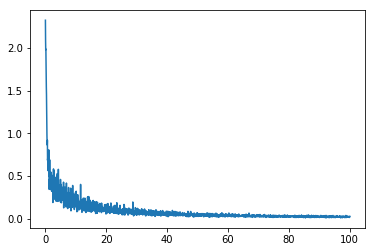

In [7]:
plt.plot(epochs, losses)

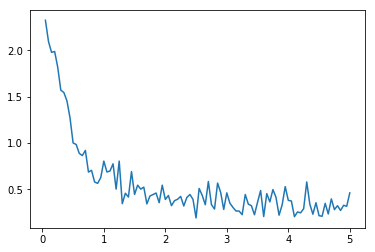

In [8]:
plt.plot(epochs[:100], losses[:100])

## Avaliando a acurácia tanto no conjunto de treinamento como no conjunto de testes

In [9]:
def getAccuracy(model, input_data, targets):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)

    predicts = predicts.data.numpy()
    targets = targets.numpy()
    
    accuracy = (predicts == targets).mean()
    return accuracy

print('Training Accuracy: ', getAccuracy(model, x_train.view(-1, 28*28), y_train))

print('Test Accuracy: ', getAccuracy(model, x_test.view(-1, 28*28), y_test))

Training Accuracy:  1.0


NameError: name 'x_test' is not defined

# Atividades

## Exercícios

1. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

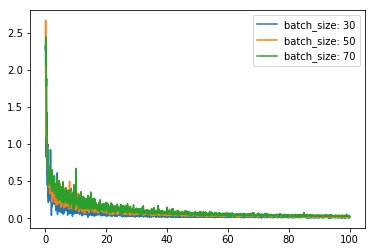

In [29]:
plt.figure()
for batchsize, (epochs, losses) in sorted(d_batchsize.items()):
    plt.plot(epochs, losses, label='batch_size: {}'.format(batchsize))
plt.legend()
plt.show()

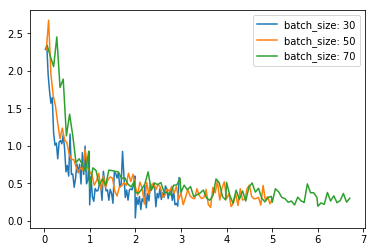

In [30]:
plt.figure()
for batchsize, (epochs, losses) in sorted(d_batchsize.items()):
    plt.plot(epochs[:100], losses[:100], label='batch_size: {}'.format(batchsize))
plt.legend()
plt.show()

## Perguntas

1. Qual é o tamanho do mini-batch?
2. Em uma época, quantos mini-batches existem?

## Conclusões sobre os experimentos deste notebook
